## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [10]:
#import the package
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [11]:
#read the file
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [6]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [12]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [5]:
#find the number of user that is using old_page and treatment
old_treat = df.query('landing_page=="old_page"')
old_treat = old_treat.query('group == "treatment"').nunique()
#find the number of user that is using new_page and control
new_con = df.query('landing_page =="new_page"')
new_con = new_con.query('group == "control"').nunique()
#adding the two number
old_treat+new_con

user_id         3893
timestamp       3893
group              2
landing_page       2
converted          4
dtype: int64

f. Do any of the rows have missing values?

In [14]:
#find the missing value(NAN)
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [12]:
test=df.query('landing_page=="new_page"')
test=test.query('group=="treatment"')
test1=df.query('group=="control"')
test1=test1.query('landing_page=="old_page"')
frame=[test,test1]
#combine two df
df2=pd.concat(frame,axis=0)
# check to make sure there are 290,585 rows
df2.shape[0]

290585

In [6]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

# `3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [6]:
#find the unique number of the user
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [7]:
#find the duplicated user id
df2[df2.duplicated(['user_id'],keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [8]:
#1899 and 2893

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
#drop one of the row
df2.drop([1899], inplace=True)
df2.shape[0]
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [8]:
#calculate the converted mean/rate
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [8]:
#Calculate the control group's converted rate
test=df2.query('group=="control"')
test.converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [12]:
#Calculate the treatment group's converted rate
test=df2.query('group=="treatment"')
test.converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [10]:
#Calculate the probability
calc=df2.query('landing_page == "new_page"')
calc.landing_page.shape[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

The overall converted rate for df2 is 0.1196. The converted rate for control(old_page) is 0.1204 which it is larger than 0.1196 and for treatment(new_page) the conversion rate is 0.1188 which it is less than 0.1196. Finally, we can conclude there are no sufficient evidence to prove new treatment page are more conversions.  

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

H0: the new page is worse than or equal to old page.
P_new-P_old <= 0
H1: the new page is better than old page.
P_new-P_old > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [14]:
#conversion rate for new_page
P_new=df2.converted.mean()
P_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [15]:
#conversion rate for old_page
P_old=P_new

c. What is $n_{new}$, the number of individuals in the treatment group?

In [16]:
# calculate the number of people who is converted and using new_page
n_new=df2.query('landing_page=="new_page"')
n_new=n_new.converted.count()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [17]:
# calculate the number of people who is converted and using old_page
n_old=df2.query('landing_page=="old_page"')
n_old=n_old.converted.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [18]:
#perform binomial distributioin for new_page
new_page_converted=np.random.binomial(1, P_new, n_new)
p_newp=new_page_converted.mean()

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [19]:
#perform binomial distributioin for old_page
old_page_converted=np.random.binomial(1, P_old, n_old)
p_oldp=old_page_converted.mean()

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [20]:
#calculate the actual difference
diff_p=p_newp-p_oldp
diff_p

0.0012850340151632222

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [21]:
#Perform 10000 time calculation of the difference
p_diffs=[]
i=0
while i<10000:
    new_page_converted=np.random.binomial(1, P_new, n_new)
    p_newp=new_page_converted.mean()
    old_page_converted=np.random.binomial(1, P_old, n_old)
    p_oldp=old_page_converted.mean()
    diff_p=p_newp-p_oldp
    p_diffs=np.append(p_diffs, diff_p)
    i=i+1

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

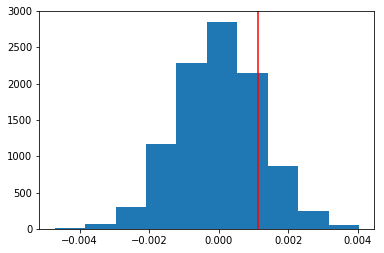

In [23]:
#calculation for obs_diff
control_cal=df2.query('group=="control"')
control_cal=control_cal.converted.mean()
treatment_cal=df2.query('group=="treatment"')
treatment_cal=treatment_cal.converted.mean()
obs_diff=treatment_cal-control_cal
#turn p_diffs into a array
p_diffs = np.array(p_diffs)
#calculated null_val but somehow my null_vals doesn't work
null_vals=np.random.normal(3,obs_diff.std(),obs_diff.size)
plt.hist(p_diffs);
plt.axvline(x=diff_p, color='red')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [24]:
#calculate the p-value
p_value=(p_diffs>obs_diff).mean()
p_value

0.90759999999999996

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The p_value is determine the statistical significance of the observed difference. As p_value is closer than 1, it means the null hypothesis is true and, when p_value is closer than 0, the alternative hypothesis is true. for our case, the alternative hypothesis is p_new > p_old. The red line represent the obs_diff. From the graph, we can highlight that the obs_diff is more toward to the left which it is supporting the null hypothesis ( p_old=> p_new)

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [25]:
#find the number of the convert for old and new
convert_old =  df2.query("landing_page == 'old_page' and converted == 1").shape[0]
convert_new =  df2.query("landing_page == 'new_page' and converted == 1").shape[0]
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [26]:
#calculate the zstat and p-value
import statsmodels.api as sm
zstat, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], value=None, alternative='smaller', prop_var=False)
zstat, p_value

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

P_value is a value use to determined the rejection of the null hypothesis. zstat represent the standard deviation. zstat is another value we use to determined the rejction of the null. When p_is small value and zstat is extreme small or large that means the null is false. In our case, the p_value is big so we don't need to care the zstat value. Overall from my calculation, it show the null hypothesis is true (the old page os better than the new page).


In this our case, we want to see the user is convert or not and is depend on the old_page or the new_page. I decided to use logistic regression because logistic regression is used to predict only if there is two outcome(0 and 1) for mulitple cases (landing_page, converted, group, etc).

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
# create intercept and dummies
df2['intercept']=1
df2[['control', 'ab_page']] = pd.get_dummies(df2['group'])
# choose baseline
df2.drop(['control'], axis=1, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [34]:
#perform logistic regression
logit = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
print('p-value(new_page) is 0.19 which it is bigger than 0.05. we can conclude p-value is not statistically significant,')
print('slope= -0.0150 means with one unit increament in independent variable, 0.015 increment in the dependent value')
results.summary2()

p-value(new_page) is 0.19 which it is bigger than 0.05. we can conclude p-value is not statistically significant,
slope= -0.0150 means with one unit increament in independent variable, 0.015 increment in the dependent value


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-03-21 01:04 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

the p_value for ab_page is 0.19. The reason for the p_value is different is because the null hypothese is different. The null hypothese for A/B is new_page is worse ot equal to old_page, meanwhile logistic regression's null hypothese had a two-tailed test which we reject that the both page could have equal effectiveness.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

The advantage of add another variable is we could find out another variable that could influence conversion rate(why this person is convert). the disadvantage is it could cause the x-variable to be correlated which it should be independent at all.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [39]:
#join the two dataframe
country_df=pd.read_csv('countries.csv')
df_n=country_df.set_index('user_id').join(df2.set_index('user_id'))
#Create dummies foe the country
df_n[['CA','UK','US']]=pd.get_dummies(df_n['country'])
#select US as the base line
logit = sm.Logit(df_n['converted'], df_n[['intercept', 'CA', 'UK']])
results = logit.fit()
print('since the p-value for both country is above 0.05, it is not statistically significant which it mean adding country has no contribution to our analysis')
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6
since the p-value for both country is above 0.05, it is not statistically significant which it mean adding country has no contribution to our analysis


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-03-21 01:06 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
CA           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
UK            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
==================================================================

"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [ ]:
df_n['CA_ab_page']=df_n['UK']*df_n['ab_page']
df_n['UK_ab_page']=df_n['US']*df_n['ab_page']
df_n['US_ab_page']=df_n['CA']*df_n['ab_page']
#select US as the base line
logit = sm.Logit(df_n['converted'], df_n[['intercept', 'CA_ab_page', 'UK_ab_page']])
results = logit.fit()
print('since the p-value for both country is above 0.05, it is not statistically significant which it mean adding interaction for page and country has no contribution to our analysis')
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6
since the p-value for both country is above 0.05, it is not statistically significant which it mean adding interaction for page and country has no contribution to our analysis


<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [125]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0